In [544]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import keras_tuner as kt
# original
pd.options.display.max_columns = 20
pd.options.display.max_rows = 60
# new set
pd.options.display.max_columns = 150
#pd.options.display.max_rows = 2000
min_max_trans = False
log_plus_1_trans = False
log_trans = False
log_trans_no_min = False

In [545]:
df = pd.read_csv(r"dataset_v10.csv",index_col=[0])
df.loc[[25,26]]
min_mv = min(df['Market value'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Columns: 139 entries, Age to Market value
dtypes: float64(135), int64(4)
memory usage: 2.1 MB


In [546]:
def delete_lst():
    drop_lst = []
    with open('delete_lst.txt') as f:
        lines = f.read().splitlines()
        drop_lst = lines
    return drop_lst
#df = df.drop(delete_lst(),axis=1)
df

,Age,Foward,Midfielder,Defender,Goals,Assists,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,xG,npxG,xA,npxG+xA,Shots Total,Shots on target,Shots on target %,Goals/Shot,Goals/Shot on target,Average Shot Distance,Shots from free kicks,npxG/Sh,Goals - xG,Non-Penalty Goals - npxG,Passes Completed,Passes Attempted,Pass Completion %,Total Passing Distance,Progressive Passing Distance,Passes Completed (Short),Passes Attempted (Short),Pass Completion % (Short),Passes Completed (Medium),Passes Attempted (Medium),Pass Completion % (Medium),Passes Completed (Long),Passes Attempted (Long),Pass Completion % (Long),Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes,Live-ball passes,Dead-ball passes,Passes from Free Kicks,Through Balls,Passes Under Pressure,Switches,Crosses,Corner Kicks,Inswinging Corner Kicks,Outswinging Corner Kicks,Straight Corner Kicks,Ground passes,Low Passes,High Passes,Passes Attempted (Left),Passes Attempted (Right),Passes Attempted (Head),Throw-Ins taken,Passes Attempted (Other),Passes Offside,Passes Out of Bounds,Passes Intercepted,Passes Blocked,Shot-Creating Actions,SCA (PassLive),SCA (PassDead),SCA (Drib),SCA (Sh),SCA (Fld),SCA (Def),Goal-Creating Actions,GCA (PassLive),GCA (PassDead),GCA (Drib),GCA (Sh),GCA (Fld),GCA (Def),Tackles,Tackles Won,Tackles (Def 3rd),Tackles (Mid 3rd),Tackles (Att 3rd),Dribblers Tackled,Dribbles Contested,% of dribblers tackled,Dribbled Past,Pressures,Successful Pressures,Successful Pressure %,Pressures (Def 3rd),Pressures (Mid 3rd),Pressures (Att 3rd),Blocks,Shots Blocked,Shots Saved,Interceptions,Tkl+Int,Clearances,Errors,Touches,Touches (Def Pen),Touches (Def 3rd),Touches (Mid 3rd),Touches (Att 3rd),Touches (Att Pen),Touches (Live-Ball),Dribbles Completed,Dribbles Attempted,Successful Dribble %,Players Dribbled Past,Nutmegs,Carries,Total Carrying Distance,Progressive Carrying Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Miscontrols,Dispossessed,Pass Targets,Passes Received,Passes Received %,Progressive Passes Rec,Second Yellow Card,Fouls Committed,Fouls Drawn,Offsides,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials won,Aerials lost,% of Aerials Won,Market value
0,21,1,0,0,0.19,0.00,0.19,0.00,0.00,0.00,0.00,0.54,0.54,0.08,0.61,3.06,0.96,0.313,0.06,0.20,13.4,0.00,0.17,-0.34,-0.34,8.23,10.53,0.782,113.94,8.81,5.17,6.70,0.771,2.68,3.06,0.875,0.19,0.19,1.000,0.57,0.00,0.00,0.00,0.00,9.77,0.77,0.00,0.00,1.91,0.00,0.19,0.00,0.00,0.00,0.00,6.70,2.49,1.34,1.53,7.47,0.38,0.00,0.57,0.00,0.00,0.38,1.72,1.15,0.96,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.96,0.57,0.38,0.38,0.19,0.00,0.57,0.000,0.57,13.40,4.21,0.314,0.77,6.51,6.13,1.91,0.19,0.0,0.00,0.96,0.19,0.0,22.40,0.19,1.91,9.00,13.02,4.40,21.64,0.38,0.57,0.667,0.38,0.00,11.87,71.81,41.94,2.30,0.96,0.57,2.49,0.96,40.98,15.13,0.369,6.70,0.0,0.38,2.30,0.19,0.00,0.0,0.00,2.87,0.96,3.26,0.227,7.0
1,31,0,0,1,0.02,0.20,0.02,0.00,0.00,0.07,0.00,0.03,0.03,0.16,0.20,0.62,0.10,0.160,0.04,0.25,22.8,0.32,0.05,-0.01,-0.01,49.11,63.91,0.768,929.47,423.76,21.52,23.98,0.897,20.24,23.80,0.850,6.67,13.81,0.483,1.67,4.11,0.96,0.37,4.68,50.71,13.19,2.26,0.02,5.49,1.87,2.41,2.56,0.89,1.48,0.07,36.11,12.06,15.73,49.41,3.77,1.38,8.37,0.17,0.44,1.06,1.77,1.01,2.58,1.26,1.13,0.02,0.12,0.05,0.00,0.39,0.12,0.20,0.00,0.05,0.02,0.00,0.89,0.44,0.44,0.39,0.05,0.37,0.89,0.417,0.52,6.35,2.14,0.337,3.27,2.46,0.62,1.43,0.42,0.0,1.21,2.09,2.49,0.0,71.27,4.28,21.29,32.42,21.64,0.76,58.05,0.15,0.44,0.333,0.15,0.00,40.64,185.56,94.16,3.64,1.62,0.12,0.27,0.32,44.43,42.61,0.959,1.06,0.0,0.52,0.44,0.02,0.00,0.0,0.00,8.49,1.16,0.69,0.627,5.0
2,19,0,0,1,0.21,0.00,0.21,0.00,0.00,0.28,0.07,0.03,0.03,0.02,0.05,0.77,0.42,0.545,0.27,0.50,23.6,0.00,0.03,0.18,0.18,37.27,44.37,0.840,597.47,155.69,19.02,20.69,0.919,15.33,18.18,0.843,2.37,4.18,0.567,0.49,1.18,0.28,0.07,1.81,35.67,8.71,0.98,0.00,6.76,0.42,1.18,0.00,0.00,0.00

In [547]:
tf.convert_to_tensor(df)
# apply normalization to all features
normalized_attr = df.columns.tolist()[:-1]
normalized_attr

#df[normalized_attr] = df[normalized_attr].apply(lambda x: (x - x.mean()) / (x.std()))
df[normalized_attr] = df[normalized_attr].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
if log_plus_1_trans:
    df['Market value'] = np.log(df['Market value']+1)+min(df['Market value'])
elif log_trans:
    df['Market value'] = np.log(df['Market value'])+min(df['Market value'])
elif log_trans_no_min:
    df['Market value'] = np.log(df['Market value'])
df


,Age,Foward,Midfielder,Defender,Goals,Assists,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,xG,npxG,xA,npxG+xA,Shots Total,Shots on target,Shots on target %,Goals/Shot,Goals/Shot on target,Average Shot Distance,Shots from free kicks,npxG/Sh,Goals - xG,Non-Penalty Goals - npxG,Passes Completed,Passes Attempted,Pass Completion %,Total Passing Distance,Progressive Passing Distance,Passes Completed (Short),Passes Attempted (Short),Pass Completion % (Short),Passes Completed (Medium),Passes Attempted (Medium),Pass Completion % (Medium),Passes Completed (Long),Passes Attempted (Long),Pass Completion % (Long),Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes,Live-ball passes,Dead-ball passes,Passes from Free Kicks,Through Balls,Passes Under Pressure,Switches,Crosses,Corner Kicks,Inswinging Corner Kicks,Outswinging Corner Kicks,Straight Corner Kicks,Ground passes,Low Passes,High Passes,Passes Attempted (Left),Passes Attempted (Right),Passes Attempted (Head),Throw-Ins taken,Passes Attempted (Other),Passes Offside,Passes Out of Bounds,Passes Intercepted,Passes Blocked,Shot-Creating Actions,SCA (PassLive),SCA (PassDead),SCA (Drib),SCA (Sh),SCA (Fld),SCA (Def),Goal-Creating Actions,GCA (PassLive),GCA (PassDead),GCA (Drib),GCA (Sh),GCA (Fld),GCA (Def),Tackles,Tackles Won,Tackles (Def 3rd),Tackles (Mid 3rd),Tackles (Att 3rd),Dribblers Tackled,Dribbles Contested,% of dribblers tackled,Dribbled Past,Pressures,Successful Pressures,Successful Pressure %,Pressures (Def 3rd),Pressures (Mid 3rd),Pressures (Att 3rd),Blocks,Shots Blocked,Shots Saved,Interceptions,Tkl+Int,Clearances,Errors,Touches,Touches (Def Pen),Touches (Def 3rd),Touches (Mid 3rd),Touches (Att 3rd),Touches (Att Pen),Touches (Live-Ball),Dribbles Completed,Dribbles Attempted,Successful Dribble %,Players Dribbled Past,Nutmegs,Carries,Total Carrying Distance,Progressive Carrying Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Miscontrols,Dispossessed,Pass Targets,Passes Received,Passes Received %,Progressive Passes Rec,Second Yellow Card,Fouls Committed,Fouls Drawn,Offsides,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials won,Aerials lost,% of Aerials Won,Market value
0,0.173913,1.0,0.0,0.0,0.134752,0.000000,0.168142,0.000000,0.000,0.000000,0.000000,0.457627,0.580645,0.150943,0.554545,0.592079,0.412281,0.278361,0.06,0.20,0.358491,0.000000,0.296296,0.056180,0.056180,0.000000,0.000000,0.600000,0.000000,0.000000,0.028294,0.039260,0.458015,0.021978,0.000000,0.784519,0.010491,0.000000,1.000,0.156593,0.000000,0.000000,0.000000,0.000000,0.000000,0.047502,0.000000,0.000000,0.037361,0.000000,0.024297,0.000000,0.000000,0.000000,0.000000,0.000000,0.055975,0.004842,0.016327,0.068557,0.070896,0.000000,0.242553,0.000000,0.000000,0.082262,0.560261,0.180818,0.192,0.000000,0.163793,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.198347,0.177019,0.145594,0.140221,0.132867,0.000000,0.101010,0.000,0.167155,0.285402,0.328063,0.494565,0.042137,0.295652,0.360588,0.536517,0.106145,0.0,0.000000,0.101183,0.019730,0.0,0.010612,0.011118,0.023288,0.004691,0.263224,0.427184,0.017859,0.071834,0.068354,0.667,0.067138,0.000000,0.010104,0.107001,0.126953,0.147844,0.171735,0.145780,0.489194,0.203822,0.351237,0.076905,0.024883,0.471167,0.0,0.056641,0.494624,0.075697,0.000000,0.0,0.000000,0.074250,0.102345,0.327198,0.264877,7.0
1,0.608696,0.0,0.0,1.0,0.014184,0.289855,0.017699,0.000000,0.000,0.090909,0.000000,0.025424,0.032258,0.301887,0.181818,0.108911,0.035088,0.117647,0.04,0.25,0.654088,0.355556,0.074074,0.426966,0.426966,0.508648,0.624693,0.568182,0.481542,0.684397,0.381425,0.398214,0.778626,0.432546,0.485260,0.732218,0.368305,0.554560,0.483,0.458791,0.337716,0.220183,0.189744,0.458824,0.484956,0.813695,0.400000,0.025641,0.321940,0.264498,0.308184,0.425957,0.294702,0.474359,0.072917,0.378458,0.657862,0.638204,0.690218,0.027578,0.2

# splitting trainning and test set

In [548]:
import random
from datetime import datetime
random.seed(datetime.now())
train_dataset = df.sample(frac=0.75, random_state=random.randint(0,100000))
test_dataset = df.drop(train_dataset.index)
train_dataset

,Age,Foward,Midfielder,Defender,Goals,Assists,Non-Penalty Goals,Penalty Kicks Made,Penalty Kicks Attempted,Yellow Cards,Red Cards,xG,npxG,xA,npxG+xA,Shots Total,Shots on target,Shots on target %,Goals/Shot,Goals/Shot on target,Average Shot Distance,Shots from free kicks,npxG/Sh,Goals - xG,Non-Penalty Goals - npxG,Passes Completed,Passes Attempted,Pass Completion %,Total Passing Distance,Progressive Passing Distance,Passes Completed (Short),Passes Attempted (Short),Pass Completion % (Short),Passes Completed (Medium),Passes Attempted (Medium),Pass Completion % (Medium),Passes Completed (Long),Passes Attempted (Long),Pass Completion % (Long),Key Passes,Passes into Final Third,Passes into Penalty Area,Crosses into Penalty Area,Progressive Passes,Live-ball passes,Dead-ball passes,Passes from Free Kicks,Through Balls,Passes Under Pressure,Switches,Crosses,Corner Kicks,Inswinging Corner Kicks,Outswinging Corner Kicks,Straight Corner Kicks,Ground passes,Low Passes,High Passes,Passes Attempted (Left),Passes Attempted (Right),Passes Attempted (Head),Throw-Ins taken,Passes Attempted (Other),Passes Offside,Passes Out of Bounds,Passes Intercepted,Passes Blocked,Shot-Creating Actions,SCA (PassLive),SCA (PassDead),SCA (Drib),SCA (Sh),SCA (Fld),SCA (Def),Goal-Creating Actions,GCA (PassLive),GCA (PassDead),GCA (Drib),GCA (Sh),GCA (Fld),GCA (Def),Tackles,Tackles Won,Tackles (Def 3rd),Tackles (Mid 3rd),Tackles (Att 3rd),Dribblers Tackled,Dribbles Contested,% of dribblers tackled,Dribbled Past,Pressures,Successful Pressures,Successful Pressure %,Pressures (Def 3rd),Pressures (Mid 3rd),Pressures (Att 3rd),Blocks,Shots Blocked,Shots Saved,Interceptions,Tkl+Int,Clearances,Errors,Touches,Touches (Def Pen),Touches (Def 3rd),Touches (Mid 3rd),Touches (Att 3rd),Touches (Att Pen),Touches (Live-Ball),Dribbles Completed,Dribbles Attempted,Successful Dribble %,Players Dribbled Past,Nutmegs,Carries,Total Carrying Distance,Progressive Carrying Distance,Progressive Carries,Carries into Final Third,Carries into Penalty Area,Miscontrols,Dispossessed,Pass Targets,Passes Received,Passes Received %,Progressive Passes Rec,Second Yellow Card,Fouls Committed,Fouls Drawn,Offsides,Penalty Kicks Won,Penalty Kicks Conceded,Own Goals,Ball Recoveries,Aerials won,Aerials lost,% of Aerials Won,Market value
133,0.782609,0.0,1.0,0.0,0.028369,0.000000,0.035398,0.0,0.0,0.337662,0.000000,0.033898,0.043011,0.056604,0.063636,0.166337,0.162281,0.400210,0.05,0.11,0.638365,0.000000,0.074074,0.438202,0.438202,0.499067,0.537390,0.768182,0.529098,0.392166,0.289201,0.296843,0.793893,0.479542,0.506551,0.838912,0.452236,0.452362,0.725,0.142857,0.446179,0.128440,0.046154,0.431373,0.531509,0.111659,0.251327,0.051282,0.481717,0.432815,0.028133,0.006656,0.000000,0.012821,0.000000,0.426586,0.316981,0.384243,0.658128,0.045963,0.449627,0.027911,0.127660,0.114035,0.502008,0.272494,0.267101,0.237421,0.276,0.000000,0.000000,0.051282,0.033613,0.074074,0.069231,0.090909,0.000000,0.00,0.000000,0.000000,0.000000,0.419421,0.375776,0.314176,0.335793,0.209790,0.328829,0.351515,0.405,0.316716,0.293861,0.256917,0.334239,0.367193,0.309783,0.108824,0.314607,0.167598,0.0,0.336493,0.428384,0.192108,0.105263,0.520340,0.166764,0.312186,0.570689,0.201475,0.054369,0.518865,0.088847,0.067089,0.846,0.091873,0.000000,0.478478,0.495117,0.433533,0.336071,0.200358,0.010230,0.143418,0.182590,0.440573,0.436701,0.895801,0.090717,0.0,0.277344,0.249462,0.000000,0.000000,0.000000,0.0,0.682464,0.147122,0.157464,0.541424,1.5
1004,0.130435,0.0,1.0,0.0,0.042553,0.246377,0.053097,0.0,0.0,0.363636,0.333333,0.076271,0.096774,0.207547,0.181818,0.443564,0.337719,0.307773,0.02,0.07,0.691824,0.433333,0.055556,0.404494,0.404494,0.259176,0.317730,0.575000,0.247783,0.191225,0.224406,0.227669,0.796438,0.191022,0.214319,0.650628,0.217559,0.315554,0.496,0.357143,0.226787,0.192661,0.030769,0.369608,0.265932,0.336829,0.348673,0.217949,0.548490,0.381895,0.172634,0.394343,0.241722,0.253205,0.114583,0.235620,0.168553,0.315141,0.449824,0.019493,0.23134

In [549]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('Market value')
test_labels = test_features.pop('Market value')
input_dim = train_features.shape[1]

# apply PCA

In [550]:
# apply PCA

pca = PCA(n_components = .95)
train_features=pca.fit_transform(train_features)
test_features = pca.transform(test_features)
print(train_features.shape)
print(test_features.shape)
input_dim = test_features.shape[1]


(1420, 47)
(474, 47)


# Autoencoder

In [551]:
auto_encoder = models.load_model("auto_encoder_1.h5")
auto_encoder.summary()
#train_features = auto_encoder.predict(train_features)
print(train_features.shape)
from keras.utils.vis_utils import plot_model
plot_model(auto_encoder,"autoencode_arch.png")

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 64)                8896      
                                                                 
 dense_23 (Dense)            (None, 138)               8970      
                                                                 
Total params: 17,866
Trainable params: 17,866
Non-trainable params: 0
_________________________________________________________________
(1420, 47)
('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


# Normal NN

In [552]:
def build_and_compile_model():
      model = keras.Sequential([
      layers.Input(shape=(input_dim,)),
      layers.Dense(16, activation='relu'),
      #layers.Dense(32, activation='relu'),
      layers.Dense(1)
  ])

      model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
      return model
    

In [553]:
my_model = build_and_compile_model()
my_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 16)                768       
                                                                 
 dense_63 (Dense)            (None, 1)                 17        
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [554]:
tf.autograph.experimental.do_not_convert
history = my_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    batch_size=100,
    verbose=1, epochs=1500)
#200 250 500 1000

Epoch 1/1500
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 8/12 [===================>..........] - ETA: 0s - loss: 12.4121WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F9FC48F318> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the f

Epoch 63/1500
12/12 [==============================] - 0s 6ms/step - loss: 7.6592 - val_loss: 8.1828
Epoch 64/1500
12/12 [==============================] - 0s 6ms/step - loss: 7.6378 - val_loss: 8.1532
Epoch 65/1500
12/12 [==============================] - 0s 6ms/step - loss: 7.6118 - val_loss: 8.1261
Epoch 66/1500
12/12 [==============================] - 0s 6ms/step - loss: 7.5895 - val_loss: 8.1013
Epoch 67/1500
12/12 [==============================] - 0s 6ms/step - loss: 7.5670 - val_loss: 8.0784
Epoch 68/1500
12/12 [==============================] - 0s 6ms/step - loss: 7.5465 - val_loss: 8.0537
Epoch 69/1500
12/12 [==============================] - 0s 6ms/step - loss: 7.5258 - val_loss: 8.0328
Epoch 70/1500
12/12 [==============================] - 0s 7ms/step - loss: 7.5073 - val_loss: 8.0181
Epoch 71/1500
12/12 [==============================] - 0s 7ms/step - loss: 7.4901 - val_loss: 8.0002
Epoch 72/1500
12/12 [==============================] - 0s 9ms/step - loss: 7.4717 - val_los

12/12 [==============================] - 0s 7ms/step - loss: 6.7837 - val_loss: 7.5071
Epoch 144/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.7780 - val_loss: 7.5033
Epoch 145/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.7724 - val_loss: 7.4997
Epoch 146/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.7670 - val_loss: 7.4967
Epoch 147/1500
12/12 [==============================] - 0s 6ms/step - loss: 6.7616 - val_loss: 7.4943
Epoch 148/1500
12/12 [==============================] - 0s 6ms/step - loss: 6.7569 - val_loss: 7.4909
Epoch 149/1500
12/12 [==============================] - 0s 6ms/step - loss: 6.7514 - val_loss: 7.4871
Epoch 150/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.7468 - val_loss: 7.4847
Epoch 151/1500
12/12 [==============================] - 0s 6ms/step - loss: 6.7418 - val_loss: 7.4827
Epoch 152/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.7374 - val_loss: 7.

12/12 [==============================] - 0s 7ms/step - loss: 6.4366 - val_loss: 7.3762
Epoch 224/1500
12/12 [==============================] - 0s 8ms/step - loss: 6.4333 - val_loss: 7.3754
Epoch 225/1500
12/12 [==============================] - 0s 6ms/step - loss: 6.4293 - val_loss: 7.3767
Epoch 226/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.4258 - val_loss: 7.3767
Epoch 227/1500
12/12 [==============================] - 0s 6ms/step - loss: 6.4226 - val_loss: 7.3764
Epoch 228/1500
12/12 [==============================] - 0s 6ms/step - loss: 6.4216 - val_loss: 7.3780
Epoch 229/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.4154 - val_loss: 7.3762
Epoch 230/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.4128 - val_loss: 7.3736
Epoch 231/1500
12/12 [==============================] - 0s 6ms/step - loss: 6.4100 - val_loss: 7.3761
Epoch 232/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.4069 - val_loss: 7.

12/12 [==============================] - 0s 9ms/step - loss: 6.1827 - val_loss: 7.3569
Epoch 304/1500
12/12 [==============================] - 0s 8ms/step - loss: 6.1782 - val_loss: 7.3577
Epoch 305/1500
12/12 [==============================] - 0s 8ms/step - loss: 6.1756 - val_loss: 7.3571
Epoch 306/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.1720 - val_loss: 7.3578
Epoch 307/1500
12/12 [==============================] - 0s 8ms/step - loss: 6.1696 - val_loss: 7.3584
Epoch 308/1500
12/12 [==============================] - 0s 14ms/step - loss: 6.1666 - val_loss: 7.3583
Epoch 309/1500
12/12 [==============================] - 0s 9ms/step - loss: 6.1642 - val_loss: 7.3577
Epoch 310/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.1603 - val_loss: 7.3569
Epoch 311/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.1588 - val_loss: 7.3589
Epoch 312/1500
12/12 [==============================] - 0s 7ms/step - loss: 6.1558 - val_loss: 7

12/12 [==============================] - 0s 8ms/step - loss: 5.9756 - val_loss: 7.3769
Epoch 384/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.9727 - val_loss: 7.3786
Epoch 385/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.9713 - val_loss: 7.3802
Epoch 386/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.9685 - val_loss: 7.3790
Epoch 387/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.9663 - val_loss: 7.3796
Epoch 388/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.9640 - val_loss: 7.3787
Epoch 389/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.9615 - val_loss: 7.3803
Epoch 390/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.9596 - val_loss: 7.3813
Epoch 391/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.9566 - val_loss: 7.3813
Epoch 392/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.9555 - val_loss: 7.

12/12 [==============================] - 0s 7ms/step - loss: 5.8018 - val_loss: 7.4374
Epoch 464/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.7990 - val_loss: 7.4379
Epoch 465/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.7986 - val_loss: 7.4389
Epoch 466/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.7949 - val_loss: 7.4401
Epoch 467/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.7936 - val_loss: 7.4433
Epoch 468/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.7915 - val_loss: 7.4428
Epoch 469/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.7893 - val_loss: 7.4454
Epoch 470/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.7877 - val_loss: 7.4431
Epoch 471/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.7851 - val_loss: 7.4432
Epoch 472/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.7834 - val_loss: 7.

12/12 [==============================] - 0s 8ms/step - loss: 5.6353 - val_loss: 7.5041
Epoch 544/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.6328 - val_loss: 7.5064
Epoch 545/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.6345 - val_loss: 7.5086
Epoch 546/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.6311 - val_loss: 7.5045
Epoch 547/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.6273 - val_loss: 7.5080
Epoch 548/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.6283 - val_loss: 7.5089
Epoch 549/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.6235 - val_loss: 7.5078
Epoch 550/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.6207 - val_loss: 7.5088
Epoch 551/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.6194 - val_loss: 7.5110
Epoch 552/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.6169 - val_loss: 7.

12/12 [==============================] - 0s 7ms/step - loss: 5.4921 - val_loss: 7.5491
Epoch 624/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.4911 - val_loss: 7.5514
Epoch 625/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.4891 - val_loss: 7.5503
Epoch 626/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.4883 - val_loss: 7.5511
Epoch 627/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.4856 - val_loss: 7.5508
Epoch 628/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.4831 - val_loss: 7.5505
Epoch 629/1500
12/12 [==============================] - 0s 6ms/step - loss: 5.4827 - val_loss: 7.5513
Epoch 630/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.4788 - val_loss: 7.5527
Epoch 631/1500
12/12 [==============================] - 0s 6ms/step - loss: 5.4781 - val_loss: 7.5558
Epoch 632/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.4769 - val_loss: 7.

12/12 [==============================] - 0s 7ms/step - loss: 5.3691 - val_loss: 7.5969
Epoch 704/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.3667 - val_loss: 7.5997
Epoch 705/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.3660 - val_loss: 7.5999
Epoch 706/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.3648 - val_loss: 7.5996
Epoch 707/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.3620 - val_loss: 7.6002
Epoch 708/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.3608 - val_loss: 7.5994
Epoch 709/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.3592 - val_loss: 7.6016
Epoch 710/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.3583 - val_loss: 7.6022
Epoch 711/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.3571 - val_loss: 7.6030
Epoch 712/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.3568 - val_loss: 7.

12/12 [==============================] - 0s 7ms/step - loss: 5.2601 - val_loss: 7.6429
Epoch 784/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.2602 - val_loss: 7.6421
Epoch 785/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.2567 - val_loss: 7.6448
Epoch 786/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.2556 - val_loss: 7.6436
Epoch 787/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.2541 - val_loss: 7.6439
Epoch 788/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.2541 - val_loss: 7.6446
Epoch 789/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.2532 - val_loss: 7.6453
Epoch 790/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.2523 - val_loss: 7.6427
Epoch 791/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.2513 - val_loss: 7.6463
Epoch 792/1500
12/12 [==============================] - 0s 9ms/step - loss: 5.2507 - val_loss: 7.

12/12 [==============================] - 0s 8ms/step - loss: 5.1627 - val_loss: 7.6768
Epoch 864/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.1630 - val_loss: 7.6757
Epoch 865/1500
12/12 [==============================] - 0s 6ms/step - loss: 5.1619 - val_loss: 7.6779
Epoch 866/1500
12/12 [==============================] - 0s 6ms/step - loss: 5.1613 - val_loss: 7.6745
Epoch 867/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.1621 - val_loss: 7.6766
Epoch 868/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.1594 - val_loss: 7.6733
Epoch 869/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.1588 - val_loss: 7.6789
Epoch 870/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.1564 - val_loss: 7.6783
Epoch 871/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.1547 - val_loss: 7.6777
Epoch 872/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.1531 - val_loss: 7.

12/12 [==============================] - 0s 7ms/step - loss: 5.0727 - val_loss: 7.7033
Epoch 944/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.0705 - val_loss: 7.7019
Epoch 945/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.0690 - val_loss: 7.7073
Epoch 946/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.0687 - val_loss: 7.7048
Epoch 947/1500
12/12 [==============================] - 0s 6ms/step - loss: 5.0669 - val_loss: 7.7021
Epoch 948/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.0669 - val_loss: 7.7076
Epoch 949/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.0658 - val_loss: 7.7043
Epoch 950/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.0635 - val_loss: 7.7081
Epoch 951/1500
12/12 [==============================] - 0s 8ms/step - loss: 5.0624 - val_loss: 7.7087
Epoch 952/1500
12/12 [==============================] - 0s 7ms/step - loss: 5.0616 - val_loss: 7.

12/12 [==============================] - 0s 7ms/step - loss: 4.9764 - val_loss: 7.7218
Epoch 1024/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.9751 - val_loss: 7.7252
Epoch 1025/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.9729 - val_loss: 7.7269
Epoch 1026/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.9735 - val_loss: 7.7241
Epoch 1027/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.9706 - val_loss: 7.7251
Epoch 1028/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.9699 - val_loss: 7.7265
Epoch 1029/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.9701 - val_loss: 7.7298
Epoch 1030/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.9698 - val_loss: 7.7278
Epoch 1031/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.9671 - val_loss: 7.7254
Epoch 1032/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.9656 - val

12/12 [==============================] - 0s 8ms/step - loss: 4.8838 - val_loss: 7.7468
Epoch 1103/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.8837 - val_loss: 7.7470
Epoch 1104/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.8844 - val_loss: 7.7501
Epoch 1105/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.8852 - val_loss: 7.7435
Epoch 1106/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.8802 - val_loss: 7.7490
Epoch 1107/1500
12/12 [==============================] - 0s 10ms/step - loss: 4.8810 - val_loss: 7.7470
Epoch 1108/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.8828 - val_loss: 7.7481
Epoch 1109/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.8791 - val_loss: 7.7507
Epoch 1110/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.8762 - val_loss: 7.7521
Epoch 1111/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.8747 - va

12/12 [==============================] - 0s 9ms/step - loss: 4.8084 - val_loss: 7.7643
Epoch 1182/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.8051 - val_loss: 7.7698
Epoch 1183/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.8015 - val_loss: 7.7711
Epoch 1184/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.8020 - val_loss: 7.7727
Epoch 1185/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.8009 - val_loss: 7.7686
Epoch 1186/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.7990 - val_loss: 7.7711
Epoch 1187/1500
12/12 [==============================] - ETA: 0s - loss: 4.797 - 0s 8ms/step - loss: 4.7974 - val_loss: 7.7696
Epoch 1188/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.7966 - val_loss: 7.7701
Epoch 1189/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.7961 - val_loss: 7.7710
Epoch 1190/1500
12/12 [==============================] - 0s 10ms/

12/12 [==============================] - 0s 7ms/step - loss: 4.7375 - val_loss: 7.8059
Epoch 1261/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.7351 - val_loss: 7.8068
Epoch 1262/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.7365 - val_loss: 7.8068
Epoch 1263/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.7347 - val_loss: 7.8072
Epoch 1264/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.7354 - val_loss: 7.8085
Epoch 1265/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.7357 - val_loss: 7.8045
Epoch 1266/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.7345 - val_loss: 7.8096
Epoch 1267/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.7338 - val_loss: 7.8043
Epoch 1268/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.7307 - val_loss: 7.8070
Epoch 1269/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.7286 - val

12/12 [==============================] - 0s 11ms/step - loss: 4.6769 - val_loss: 7.8458
Epoch 1340/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.6767 - val_loss: 7.8502
Epoch 1341/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.6788 - val_loss: 7.8461
Epoch 1342/1500
12/12 [==============================] - 0s 11ms/step - loss: 4.6750 - val_loss: 7.8482
Epoch 1343/1500
12/12 [==============================] - 0s 10ms/step - loss: 4.6738 - val_loss: 7.8493
Epoch 1344/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.6739 - val_loss: 7.8503
Epoch 1345/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.6725 - val_loss: 7.8525
Epoch 1346/1500
12/12 [==============================] - 0s 9ms/step - loss: 4.6710 - val_loss: 7.8494
Epoch 1347/1500
12/12 [==============================] - 0s 11ms/step - loss: 4.6716 - val_loss: 7.8522
Epoch 1348/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.6708 -

12/12 [==============================] - 0s 8ms/step - loss: 4.6195 - val_loss: 7.8937
Epoch 1419/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.6204 - val_loss: 7.8941
Epoch 1420/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.6189 - val_loss: 7.8943
Epoch 1421/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.6179 - val_loss: 7.8955
Epoch 1422/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.6177 - val_loss: 7.9003
Epoch 1423/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.6172 - val_loss: 7.8969
Epoch 1424/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.6159 - val_loss: 7.9002
Epoch 1425/1500
12/12 [==============================] - ETA: 0s - loss: 4.091 - 0s 7ms/step - loss: 4.6147 - val_loss: 7.9026
Epoch 1426/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.6133 - val_loss: 7.9056
Epoch 1427/1500
12/12 [==============================] - 0s 7ms/s

12/12 [==============================] - 0s 11ms/step - loss: 4.5665 - val_loss: 7.9422
Epoch 1498/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.5695 - val_loss: 7.9428
Epoch 1499/1500
12/12 [==============================] - 0s 7ms/step - loss: 4.5668 - val_loss: 7.9467
Epoch 1500/1500
12/12 [==============================] - 0s 8ms/step - loss: 4.5660 - val_loss: 7.9466


In [555]:
def plot_loss(history):
    max_val = max(max(history.history['loss']),max(history.history['loss'])) +1
    min_val = min(min(history.history['loss']),min(history.history['loss']))-1
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([min_val,max_val])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


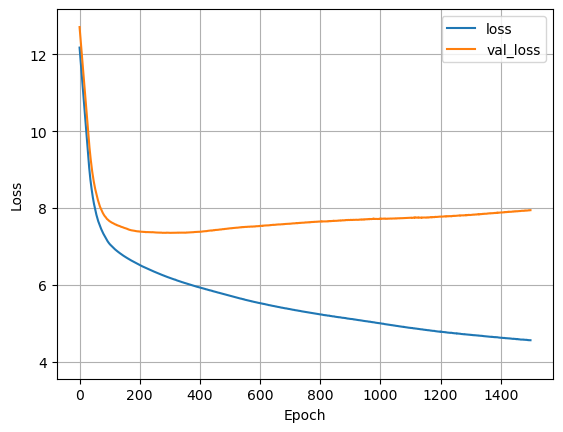

In [556]:
plot_loss(history)

In [557]:
test_predictions = my_model.predict(test_features).flatten()
test_results = {}
test_results['my_model'] = ["{:.4f}".format(my_model.evaluate(test_features, test_labels, verbose=0))]
RMSE = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(test_labels, test_predictions))))
test_results['my_model'].append("{:.4f}".format(RMSE.numpy()))
metrices = pd.DataFrame(test_results, index=['Mean absolute error','Root mean square error']).T
print(metrices.to_string())

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
         Mean absolute error Root mean square error
my_model              9.0574                14.2757


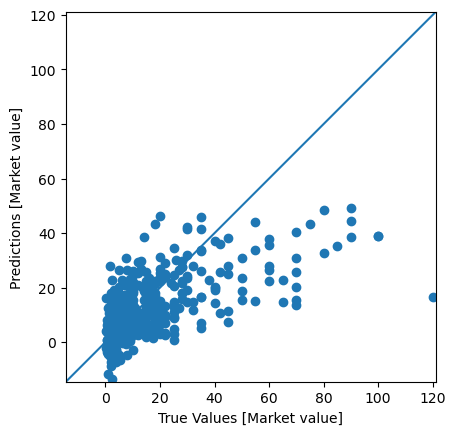

% of samples < 60 million: 0.9514767932489452


In [558]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Market value]')
plt.ylabel('Predictions [Market value]')
min_val = min(min(test_labels),min(test_predictions))-1
max_val = 160+1
max_val = max(max(test_labels),max(test_predictions))+1
lims = [min_val, max_val]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.show()
print(f"% of samples < 60 million: {len([x for x in test_labels if x < 60])/test_labels.shape[0]}")
plt.clf()

# undo log transformation

In [559]:
if log_plus_1_trans:
    unlog_test_labels = np.exp(test_labels - min_mv)  -1
    unlog_test_predictions = np.exp(test_predictions - min_mv)  -1
elif log_trans:
    unlog_test_labels = np.exp(test_labels - min_mv) 
    unlog_test_predictions = np.exp(test_predictions - min_mv) 
elif log_trans_no_min:
    unlog_test_labels = np.exp(test_labels) 
    unlog_test_predictions = np.exp(test_predictions) 

if log_plus_1_trans or log_trans or log_trans_no_min:
    plt.scatter(unlog_test_labels, unlog_test_predictions)
    plt.xlabel('unlog True Values [Market value]')
    plt.ylabel('unlog Predictions [Market value]')
    min_val = min(min(unlog_test_labels),min(unlog_test_predictions))-1
    max_val = 160+1
    #max_val = max(max(test_labels),max(test_predictions))+1
    lims = [min_val, max_val]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)
    plt.show()


In [560]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(unlog_test_labels, unlog_test_predictions,squared=False)
MAE = mean_absolute_error(unlog_test_labels, unlog_test_predictions)
print(RMSE)
test_results={}

test_results['unlog'] = ["{:.4f}".format(MAE)]
test_results['unlog'].append("{:.4f}".format(RMSE))
pd.DataFrame(test_results, index=['Mean absolute error','Root mean square error']).T

14.356008840514429


,Mean absolute error,Root mean square error
unlog,8.9069,14.3560


# running 500 epoches

In [561]:
7.4419	12.3914

SyntaxError: invalid syntax (<ipython-input-561-e54288c3af03>, line 1)